# Clustering, CART and SVM

In [1]:
import pandas as pd
import numpy as np
import scipy
import pandas.util.testing as tm
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import linear_model
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = 10, 6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  after removing the cwd from sys.path.


# 1. Data importing

In [2]:
data = pd.read_csv('data1.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
data

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,MSCI EM ASIA,MSCI EM EU-MIDE-AFRICA,MSCI EM EUROPE,MSCI EM LATIN AMERICA,MSCI FINLAND,MSCI FRANCE,MSCI GERMANY,MSCI HONG KONG,MSCI INDIA,MSCI ITALY,MSCI JAPAN,MSCI KOREA,MSCI MEXICO,MSCI NETHERLANDS,MSCI NEW ZEALAND,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01,1390.716,2376.29,3525.9150,1068.79,106.70,105.38,1036.23,1663.27,59.47,8566.71,403.66,210.209,244.42,1829.81,120.63,131.10,140.65,12080.11,987.16,61.26,938.40,526.86,5262.19,120.08,115.77,2373.17,811.96,404.73,1507.8101,1255.75,108.40,11136.65,1148.37,1818.40,1949.70
2016-01-08,1291.267,2260.85,3280.6683,1005.56,97.66,99.35,952.01,1586.18,54.63,8183.00,377.65,194.927,231.93,1674.47,115.86,122.85,129.12,11438.23,945.87,56.94,876.35,510.54,4757.80,112.38,113.67,2209.38,751.09,388.05,1437.6600,1177.76,101.00,10389.93,1075.30,1722.00,1831.88
2016-01-15,1257.086,2217.50,3118.2981,985.38,93.54,97.32,904.64,1541.08,51.54,7755.73,363.18,181.941,217.90,1625.73,112.37,119.45,125.17,11063.73,927.24,54.86,849.09,500.01,4738.23,110.37,113.92,2095.60,720.23,344.45,1372.9800,1133.72,97.34,10042.32,1056.01,1692.43,1789.56
2016-01-22,1254.167,2281.98,2935.0677,985.87,95.79,100.73,879.17,1582.10,51.15,8035.69,363.10,185.011,221.47,1620.67,115.08,123.00,128.08,10654.83,919.19,54.36,833.57,501.70,4769.16,114.75,112.20,2173.55,745.96,367.44,1350.0500,1160.48,99.21,10469.07,1076.48,1719.61,1814.12
2016-01-29,1298.240,2462.19,3134.0840,1005.56,96.93,103.05,958.97,1638.84,52.13,8211.17,374.07,201.286,237.29,1744.05,116.55,125.61,128.32,11002.78,941.64,53.16,866.68,508.22,5083.75,117.19,112.43,2214.88,825.18,400.93,1375.1000,1239.58,100.06,10432.42,1087.17,1774.40,1843.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-25,988.345,1450.64,2252.2500,1166.97,84.95,64.63,1424.53,2018.62,94.77,11122.05,586.97,204.113,251.32,1851.40,129.40,137.63,140.60,13557.76,1314.60,48.90,987.02,713.98,3386.63,163.96,193.67,2570.43,1162.66,554.53,1328.1400,1238.65,78.45,14099.14,1362.07,1641.51,3191.72
2020-10-02,1037.211,1506.32,2265.7000,1128.45,84.89,66.00,1365.07,2031.76,97.19,11389.27,601.70,208.396,249.75,1817.40,131.19,140.51,143.29,13494.25,1354.23,49.52,972.54,726.69,3491.80,169.19,189.41,2587.30,1172.45,543.08,1344.0300,1276.25,79.97,14355.01,1368.78,1658.14,3243.91
2020-10-09,1075.670,1617.45,2214.3200,1187.29,90.01,69.35,1447.85,2076.53,101.03,11779.71,625.29,211.647,254.26,1923.79,134.39,144.34,147.24,13860.76,1400.51,50.76,995.55,746.72,3767.52,173.03,196.06,2635.08,1212.32,553.32,1358.9700,1291.47,82.44,14602.91,1375.90,1687.56,3370.62


# 2. Average Data Sumarries

## 2.1 Calculate the mean of each series.

In [3]:
mean = data.mean().rename('mean')
mean

LUXXX                      1457.231905
MSCI ARGENTINA             2526.652262
BLP ORIENTE MEDIO          3029.482978
MSCI AUSTRALIA             1183.940159
MSCI AUSTRIA                127.418889
MSCI BELGIUM                 91.290238
MSCI BRAZIL                1813.989167
MSCI CANADA                1970.821627
MSCI CHINA                   76.788214
MSCI DENMARK               8447.657738
MSCI EM ASIA                509.413056
MSCI EM EU-MIDE-AFRICA      247.079409
MSCI EM EUROPE              304.084643
MSCI EM LATIN AMERICA      2502.462738
MSCI FINLAND                121.925278
MSCI FRANCE                 145.765476
MSCI GERMANY                143.522897
MSCI HONG KONG            14216.931151
MSCI INDIA                 1187.467976
MSCI ITALY                   55.799127
MSCI JAPAN                  943.752143
MSCI KOREA                  647.381905
MSCI MEXICO                4875.085000
MSCI NETHERLANDS            141.988175
MSCI NEW ZEALAND            145.904444
MSCI NORWAY              

## 2.2 Calculate the trimmed mean of each series, where trim=5%

In [4]:
trim5pct = data.apply(lambda col: scipy.stats.trim_mean(col, 0.05), axis=0).rename('trim5pct')
trim5pct

LUXXX                      1467.800623
MSCI ARGENTINA             2510.848070
BLP ORIENTE MEDIO          3054.058247
MSCI AUSTRALIA             1183.276053
MSCI AUSTRIA                127.519298
MSCI BELGIUM                 92.043772
MSCI BRAZIL                1829.172982
MSCI CANADA                1977.830351
MSCI CHINA                   76.861930
MSCI DENMARK               8378.563026
MSCI EM ASIA                510.596754
MSCI EM EU-MIDE-AFRICA      247.291430
MSCI EM EUROPE              304.364649
MSCI EM LATIN AMERICA      2519.500132
MSCI FINLAND                122.294825
MSCI FRANCE                 145.743728
MSCI GERMANY                143.899298
MSCI HONG KONG            14251.030658
MSCI INDIA                 1190.834605
MSCI ITALY                   55.861360
MSCI JAPAN                  945.634518
MSCI KOREA                  648.347412
MSCI MEXICO                4908.400219
MSCI NETHERLANDS            141.983026
MSCI NEW ZEALAND            144.709254
MSCI NORWAY              

## 2.3 Calculate the trimmed mean of each series, where trim=50%.  This is also called the median

In [5]:
trim50pct = data.median().rename('trim50pct')
trim50pct

LUXXX                      1491.08100
MSCI ARGENTINA             2541.97500
BLP ORIENTE MEDIO          3113.41405
MSCI AUSTRALIA             1177.37500
MSCI AUSTRIA                130.63500
MSCI BELGIUM                 95.01500
MSCI BRAZIL                1860.96000
MSCI CANADA                1990.63000
MSCI CHINA                   78.71000
MSCI DENMARK               8227.80500
MSCI EM ASIA                517.31000
MSCI EM EU-MIDE-AFRICA      251.16550
MSCI EM EUROPE              306.43000
MSCI EM LATIN AMERICA      2598.95500
MSCI FINLAND                124.12000
MSCI FRANCE                 147.93000
MSCI GERMANY                144.64500
MSCI HONG KONG            14342.61000
MSCI INDIA                 1230.79000
MSCI ITALY                   55.96000
MSCI JAPAN                  953.66000
MSCI KOREA                  649.64000
MSCI MEXICO                4948.77000
MSCI NETHERLANDS            143.67500
MSCI NEW ZEALAND            135.85000
MSCI NORWAY                2795.26500
MSCI PERU   

## 2.4 Using subjective weights, apply a probability each of the 3 averages.  The 3 probabilities should sum to 1

Here we simply assume 40%, 40%, 20% probability of mean, mean5pct trimmed and mean 50pct trimmed respectively

In [6]:
weighteddf = pd.concat([mean, trim5pct, trim50pct], axis=1)
weighteddf[['mean_wt']]=0.4
weighteddf[['trim5pct_wt']]=0.4
weighteddf['trim50pct_wt']= 1-weighteddf['mean_wt']-weighteddf['trim5pct_wt']
weighteddf['probability_weighted_avrg'] =   weighteddf['mean_wt'] * weighteddf['mean'] \
                                          + weighteddf['trim5pct_wt'] * weighteddf['trim5pct'] \
                                          + weighteddf['trim50pct_wt'] * weighteddf['trim50pct']
weighteddf

,mean,trim5pct,trim50pct,mean_wt,trim5pct_wt,trim50pct_wt,probability_weighted_avrg
LUXXX,1457.231905,1467.800623,1491.08100,0.4,0.4,0.2,1468.229211
MSCI ARGENTINA,2526.652262,2510.848070,2541.97500,0.4,0.4,0.2,2523.395133
BLP ORIENTE MEDIO,3029.482978,3054.058247,3113.41405,0.4,0.4,0.2,3056.099300
MSCI AUSTRALIA,1183.940159,1183.276053,1177.37500,0.4,0.4,0.2,1182.361485
MSCI AUSTRIA,127.418889,127.519298,130.63500,0.4,0.4,0.2,128.102275
MSCI BELGIUM,91.290238,92.043772,95.01500,0.4,0.4,0.2,92.336604
MSCI BRAZIL,1813.989167,1829.172982,1860.96000,0.4,0.4,0.2,1829.456860
MSCI CANADA,1970.821627,1977.830351,1990.63000,0.4,0.4,0.2,1977.586791
MSCI CHINA,76.788214,76.861930,78.71000,0.4,0.4,0.2,77.202058
MSCI DENMARK,8447.657738,8378.563026,8227.80500,0.4,0.4,0.2,8376.049306


## 2.5 Rank the series, from highest expected return to lowest expected return using your probability-weighted averages.


To calculate returns, one needs to compare the mean (expected value) v.s. the starting values of the series 
We therefore append the initial date values of the df, and then calculate the return as a ratio.

In [7]:
weighteddf['initial'] = data.iloc[0,:].T.rename('initial')
weighteddf['expected_return'] = weighteddf['probability_weighted_avrg'] /  weighteddf['initial']
weighteddf.sort_values('expected_return', ascending=False)

,mean,trim5pct,trim50pct,mean_wt,trim5pct_wt,trim50pct_wt,probability_weighted_avrg,initial,expected_return
MSCI PERU,1460.507817,1470.912061,1555.13500,0.4,0.4,0.2,1483.594952,811.9600,1.827177
MSCI BRAZIL,1813.989167,1829.172982,1860.96000,0.4,0.4,0.2,1829.456860,1036.2300,1.765493
MSCI RUSSIA,595.207738,594.610482,594.12500,0.4,0.4,0.2,594.752288,404.7300,1.469504
MSCI EM LATIN AMERICA,2502.462738,2519.500132,2598.95500,0.4,0.4,0.2,2528.576148,1829.8100,1.381879
MSCI USA,2526.448532,2521.966623,2559.08000,0.4,0.4,0.2,2531.182062,1949.7000,1.298242
MSCI CHINA,76.788214,76.861930,78.71000,0.4,0.4,0.2,77.202058,59.4700,1.298168
MSCI EM ASIA,509.413056,510.596754,517.31000,0.4,0.4,0.2,511.465924,403.6600,1.267071
MSCI EM EUROPE,304.084643,304.364649,306.43000,0.4,0.4,0.2,304.665717,244.4200,1.246484
MSCI NEW ZEALAND,145.904444,144.709254,135.85000,0.4,0.4,0.2,143.415480,115.7700,1.238797
MSCI KOREA,647.381905,648.347412,649.64000,0.4,0.4,0.2,648.219727,526.8600,1.230345


# 3. Volatility Data Summaries

Preparation of log series, log return series
For reference, data is the price series
https://www.youtube.com/watch?v=d8MBpc3ST10

In [8]:
data_log = np.log2(data)
data_logreturn = data_log.diff().dropna()
print('Price Series \n')
print(data.head())
print('\n Log Price Series \n')
print(data_log.head())
print('\n Log Return Price Series \n')
print(data_logreturn.head())

Price Series 

               LUXXX  MSCI ARGENTINA  ...  MSCI UK  MSCI USA
Date                                  ...                   
2016-01-01  1390.716         2376.29  ...  1818.40   1949.70
2016-01-08  1291.267         2260.85  ...  1722.00   1831.88
2016-01-15  1257.086         2217.50  ...  1692.43   1789.56
2016-01-22  1254.167         2281.98  ...  1719.61   1814.12
2016-01-29  1298.240         2462.19  ...  1774.40   1843.88

[5 rows x 35 columns]

 Log Price Series 

                LUXXX  MSCI ARGENTINA  ...    MSCI UK   MSCI USA
Date                                   ...                      
2016-01-01  10.441612       11.214495  ...  10.828454  10.929036
2016-01-08  10.334572       11.142650  ...  10.749869  10.839109
2016-01-15  10.295868       11.114718  ...  10.724880  10.805389
2016-01-22  10.292514       11.156070  ...  10.747866  10.825054
2016-01-29  10.342341       11.265726  ...  10.793116  10.848529

[5 rows x 35 columns]

 Log Return Price Series 

        

## 3.1 For the log return series, compute a EWMA.

In [9]:
# 1 month EWMA
# Note that this is span = 4 periods rather than a 22 or 30 because our data has weekly instead of daily frequency
ewma = data_logreturn.ewm(span=4)
# We take the std as the volatility estimate
ewma.std().dropna()

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,MSCI EM ASIA,MSCI EM EU-MIDE-AFRICA,MSCI EM EUROPE,MSCI EM LATIN AMERICA,MSCI FINLAND,MSCI FRANCE,MSCI GERMANY,MSCI HONG KONG,MSCI INDIA,MSCI ITALY,MSCI JAPAN,MSCI KOREA,MSCI MEXICO,MSCI NETHERLANDS,MSCI NEW ZEALAND,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15,0.048321,0.031052,0.021763,0.041530,0.046341,0.039050,0.034410,0.018987,0.027201,0.007959,0.028090,0.006666,0.010147,0.060367,0.009956,0.037674,0.055560,0.021739,0.023294,0.036639,0.037552,0.010839,0.098586,0.049196,0.020916,0.019018,0.036695,0.078652,0.001641,0.026532,0.034478,0.036088,0.048601,0.037898,0.039744
2016-01-22,0.048920,0.057991,0.013429,0.041833,0.082379,0.068323,0.038631,0.058402,0.058311,0.079565,0.048479,0.081329,0.069333,0.058088,0.053875,0.069564,0.076613,0.013725,0.023117,0.044366,0.033855,0.026826,0.074235,0.075449,0.015632,0.089598,0.086428,0.150663,0.027480,0.067600,0.066672,0.084878,0.058917,0.049295,0.053437
2016-01-29,0.060892,0.078233,0.109995,0.043597,0.063044,0.051656,0.119142,0.053453,0.063939,0.060955,0.058209,0.112357,0.092065,0.096698,0.040631,0.053954,0.055278,0.063337,0.040558,0.031677,0.066150,0.027743,0.087389,0.055326,0.015467,0.067816,0.113787,0.136158,0.047635,0.082655,0.050852,0.059418,0.044045,0.048239,0.044667
2016-02-05,0.048440,0.062214,0.085422,0.032271,0.050108,0.077257,0.087930,0.043302,0.048254,0.084948,0.043118,0.085412,0.072731,0.072196,0.079124,0.060434,0.055979,0.049187,0.031008,0.051046,0.062039,0.020664,0.071982,0.067015,0.014626,0.049870,0.087847,0.115068,0.036313,0.064747,0.045899,0.045284,0.048592,0.054909,0.043620
2016-02-12,0.065471,0.066365,0.074304,0.043104,0.040460,0.058966,0.079299,0.044208,0.048210,0.064703,0.045650,0.075619,0.072576,0.068393,0.064268,0.054147,0.042962,0.037854,0.057257,0.039411,0.108098,0.036141,0.076894,0.061507,0.024804,0.080754,0.075414,0.100862,0.036265,0.058808,0.056103,0.040772,0.040616,0.042773,0.033025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-25,0.068505,0.042409,0.038559,0.026728,0.044461,0.057393,0.058095,0.016212,0.044653,0.025346,0.045441,0.046415,0.048142,0.051349,0.047955,0.043797,0.046826,0.034739,0.044884,0.037466,0.017652,0.048834,0.044813,0.027107,0.043613,0.036327,0.037966,0.049278,0.011761,0.048807,0.034899,0.035153,0.033561,0.038950,0.023096
2020-10-02,0.075117,0.054088,0.031038,0.037149,0.041231,0.055683,0.046180,0.015695,0.047305,0.024906,0.047297,0.048692,0.041414,0.040372,0.042058,0.047635,0.046213,0.027862,0.048249,0.039472,0.018322,0.045612,0.052993,0.036855,0.038150,0.032292,0.036908,0.038435,0.017647,0.053101,0.042152,0.032557,0.027328,0.034351,0.025649
2020-10-09,0.062287,0.067665,0.030344,0.058008,0.069720,0.061191,0.084558,0.021838,0.047616,0.025931,0.047424,0.040735,0.044283,0.072768,0.038381,0.044632,0.043047,0.036987,0.044019,0.040106,0.027734,0.042203,0.073600,0.030545,0.046327,0.031472,0.044291,0.045928,0.016035,0.041836,0.043385,0.027130,0.021817,0.031038,0.035204


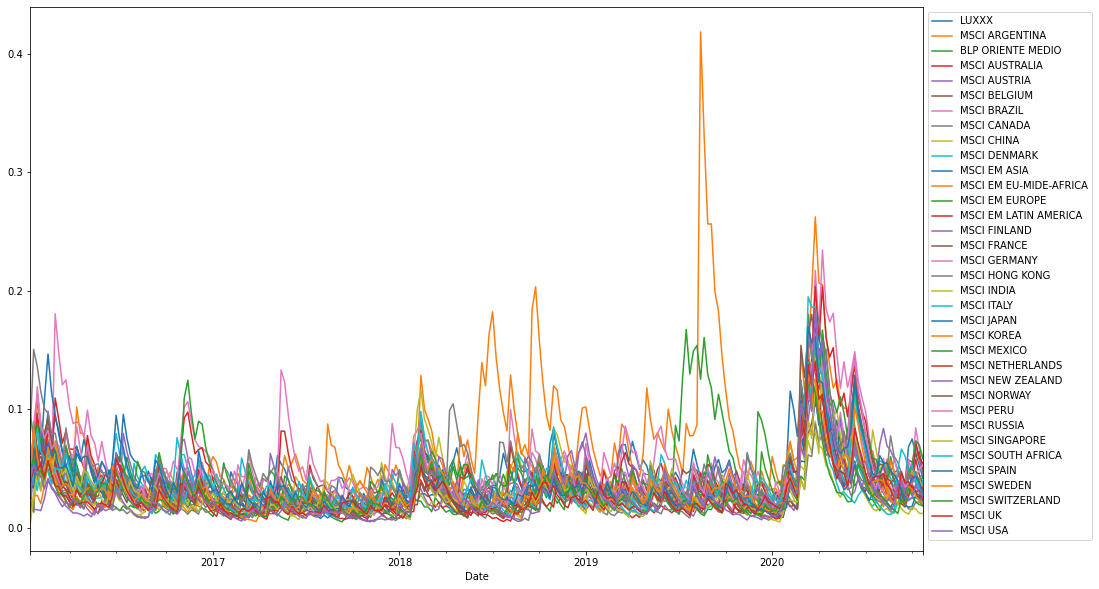

In [10]:
ewma.std().dropna().plot(figsize=(16, 10)).legend(bbox_to_anchor=(1, 1))
plt.show()

In [11]:
ewma_avrg=ewma.var().mean().rename('ewma')

## 3.2  For the log series, run a GARCH(1,1) model

We install arch to satisfy google colab with external python module 'arch'

In [12]:
pip install arch

     |████████████████████████████████| 798kB 4.4MB/s 


In [13]:
# GARCH, note that this only runs on single dimensional array.
from arch import arch_model

garchdf = []

for i in data_logreturn.columns:
  series_data = data_logreturn[i]
  # define model
  garch11 = arch_model(series_data, mean='Zero', vol='GARCH', p=1, q=1)
  # fit model
  garch11_fit = garch11.fit()
  # save the conditional volatility
  garchdf.append(garch11_fit.conditional_volatility)

garchdf = pd.concat(garchdf, axis=1, keys=data_logreturn.columns)

Iteration:      1,   Func. Count:      5,   Neg. LLF: -428.5684009762889
Iteration:      2,   Func. Count:     12,   Neg. LLF: -428.5970474712783
Iteration:      3,   Func. Count:     19,   Neg. LLF: -428.60664613561175
Iteration:      4,   Func. Count:     25,   Neg. LLF: -428.63183766614264
Iteration:      5,   Func. Count:     32,   Neg. LLF: -428.6398176875845
Iteration:      6,   Func. Count:     38,   Neg. LLF: -428.66509369010737
Iteration:      7,   Func. Count:     43,   Neg. LLF: -428.6688266130418
Iteration:      8,   Func. Count:     48,   Neg. LLF: -428.6688648247358
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -428.66886482427395
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      5,   Neg. LLF: -272.9843991184496
Iteration:      2,   Func. Count:     14,   Neg. LLF: -273.11675064862976
Iteration:      3,   Func. Count:     20,   Neg. LLF: -2

In [14]:
garchdf

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,MSCI EM ASIA,MSCI EM EU-MIDE-AFRICA,MSCI EM EUROPE,MSCI EM LATIN AMERICA,MSCI FINLAND,MSCI FRANCE,MSCI GERMANY,MSCI HONG KONG,MSCI INDIA,MSCI ITALY,MSCI JAPAN,MSCI KOREA,MSCI MEXICO,MSCI NETHERLANDS,MSCI NEW ZEALAND,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-08,0.055905,0.069027,0.049129,0.037404,0.053275,0.043781,0.088775,0.032351,0.053179,0.049166,0.041974,0.058782,0.053485,0.066061,0.047206,0.045643,0.047107,0.039700,0.036387,0.054115,0.066787,0.028831,0.060813,0.045891,0.027462,0.049152,0.068092,0.071942,0.041429,0.045548,0.053916,0.042261,0.036788,0.035635,0.033487
2016-01-15,0.070183,0.082689,0.060293,0.047015,0.074686,0.060762,0.091600,0.042070,0.060930,0.052017,0.049595,0.066877,0.056217,0.081783,0.048927,0.059764,0.069102,0.044244,0.041085,0.067071,0.072455,0.032434,0.085413,0.058631,0.027747,0.056595,0.075644,0.068294,0.047487,0.060702,0.065197,0.061229,0.055615,0.047309,0.063544
2016-01-22,0.061819,0.058685,0.062175,0.042821,0.070055,0.051759,0.086766,0.041048,0.061241,0.057015,0.049116,0.070023,0.060985,0.070934,0.047133,0.054562,0.062616,0.044184,0.037899,0.062833,0.065342,0.032259,0.071200,0.051740,0.025365,0.056831,0.071468,0.086853,0.050689,0.054694,0.060711,0.056180,0.046895,0.042493,0.054046
2016-01-29,0.052594,0.060925,0.066258,0.037970,0.062378,0.051083,0.079967,0.039578,0.056549,0.053474,0.045352,0.061798,0.055252,0.060083,0.044134,0.050966,0.056043,0.044759,0.033928,0.054964,0.057528,0.029971,0.060436,0.051376,0.025480,0.053770,0.066836,0.084088,0.045004,0.046389,0.053726,0.055371,0.040884,0.038519,0.044204
2016-02-05,0.051431,0.111751,0.070878,0.035668,0.054836,0.046133,0.085867,0.041389,0.053009,0.047335,0.044236,0.071905,0.062428,0.071482,0.039836,0.046225,0.048748,0.044480,0.033657,0.050444,0.055923,0.029004,0.067451,0.046552,0.023636,0.048933,0.083447,0.087278,0.040831,0.062076,0.047083,0.046214,0.034859,0.039525,0.038072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-25,0.041108,0.048722,0.033310,0.025261,0.042175,0.034668,0.054925,0.025062,0.039949,0.031245,0.032246,0.033762,0.040247,0.038922,0.032418,0.027937,0.033215,0.033735,0.028379,0.037123,0.030961,0.032072,0.037907,0.030875,0.035545,0.028827,0.040399,0.046430,0.023244,0.048956,0.033471,0.028805,0.025366,0.033846,0.030459
2020-10-02,0.056920,0.069632,0.035165,0.026588,0.052755,0.057314,0.063315,0.023455,0.041541,0.028586,0.036743,0.042894,0.049392,0.055818,0.040455,0.042924,0.042990,0.035664,0.035675,0.043466,0.029507,0.039582,0.048168,0.030078,0.035629,0.032745,0.043914,0.052361,0.023118,0.043648,0.041166,0.032674,0.030187,0.035492,0.025320
2020-10-09,0.059093,0.070565,0.032872,0.030907,0.046716,0.049578,0.063437,0.022413,0.041035,0.030945,0.036535,0.041057,0.045245,0.050579,0.037156,0.040089,0.040244,0.034070,0.036354,0.040138,0.029656,0.037226,0.047831,0.034334,0.034598,0.030659,0.040926,0.049878,0.023275,0.042653,0.038940,0.031748,0.026706,0.032220,0.025920


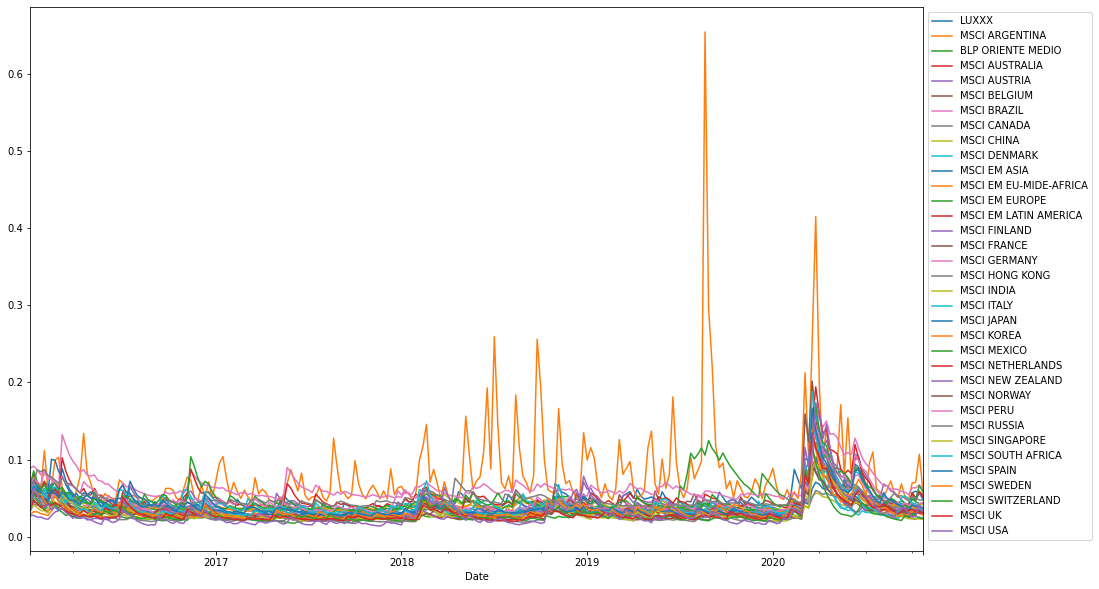

In [15]:
garchdf.plot(figsize=(16, 10)).legend(bbox_to_anchor=(1, 1))
plt.show()

The unconditional variance of GARCH is simply the expectation of non-time-varying second moment of the returns series:
https://quant.stackexchange.com/questions/8251/how-to-calculate-the-conditional-variance-of-a-time-series

Therefore, we just take Var(log return series) you will see that this is similar to the model resid of the fitted GARCH model

In [16]:
garch_avrg = data_logreturn.var().rename('garch')
garch_avrg

LUXXX                     0.002392
MSCI ARGENTINA            0.007896
BLP ORIENTE MEDIO         0.002170
MSCI AUSTRALIA            0.001063
MSCI AUSTRIA              0.002670
MSCI BELGIUM              0.001996
MSCI BRAZIL               0.005047
MSCI CANADA               0.001000
MSCI CHINA                0.001771
MSCI DENMARK              0.001291
MSCI EM ASIA              0.001268
MSCI EM EU-MIDE-AFRICA    0.001997
MSCI EM EUROPE            0.002211
MSCI EM LATIN AMERICA     0.003343
MSCI FINLAND              0.001570
MSCI FRANCE               0.001640
MSCI GERMANY              0.001771
MSCI HONG KONG            0.001196
MSCI INDIA                0.001174
MSCI ITALY                0.002233
MSCI JAPAN                0.001798
MSCI KOREA                0.001334
MSCI MEXICO               0.002856
MSCI NETHERLANDS          0.001353
MSCI NEW ZEALAND          0.001020
MSCI NORWAY               0.001171
MSCI PERU                 0.002589
MSCI RUSSIA               0.002969
MSCI SINGAPORE      

## 3.3 For the price series, compute the 1-month range (high price minus low price over past 4 weeks)

Not going to take the original price series as everything else is in log. 
Also this looks like a very simpliied version of Rogers-Satchell volatility estimator, which is build on log prices.
https://mmquant.net/introduction-to-volatility-models-with-matlab-sma-ewma-cc-range-estimators/


In [17]:
pxrange = data_log.rolling(4).max() - data_log.rolling(4).min()
pxrange.dropna(inplace=True)
pxrange

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,MSCI EM ASIA,MSCI EM EU-MIDE-AFRICA,MSCI EM EUROPE,MSCI EM LATIN AMERICA,MSCI FINLAND,MSCI FRANCE,MSCI GERMANY,MSCI HONG KONG,MSCI INDIA,MSCI ITALY,MSCI JAPAN,MSCI KOREA,MSCI MEXICO,MSCI NETHERLANDS,MSCI NEW ZEALAND,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-22,0.149098,0.099777,0.264604,0.117226,0.189905,0.114793,0.237130,0.110081,0.217428,0.143479,0.152774,0.208354,0.165696,0.175103,0.102332,0.134261,0.168221,0.181126,0.102921,0.172400,0.170900,0.075463,0.151315,0.121648,0.045189,0.179452,0.172951,0.232665,0.159442,0.147485,0.155260,0.149223,0.120964,0.103573,0.123647
2016-01-29,0.049828,0.151008,0.160596,0.029247,0.062184,0.082536,0.125344,0.088733,0.094959,0.082325,0.056683,0.145776,0.122985,0.105851,0.052692,0.072544,0.044824,0.102356,0.041279,0.099101,0.072204,0.030067,0.101545,0.086501,0.021948,0.079865,0.196251,0.219056,0.090710,0.128787,0.053251,0.060041,0.041954,0.068235,0.043140
2016-02-05,0.049828,0.160772,0.138360,0.029247,0.051360,0.098786,0.160447,0.088733,0.035015,0.113448,0.042941,0.145776,0.122985,0.112099,0.119568,0.072544,0.074640,0.054330,0.034813,0.160325,0.064249,0.029558,0.101545,0.086501,0.021948,0.086131,0.210413,0.219056,0.030515,0.128787,0.050920,0.060041,0.061056,0.068235,0.047039
2016-02-12,0.129029,0.119420,0.138360,0.071182,0.083014,0.149905,0.160447,0.055584,0.114278,0.174791,0.066738,0.121636,0.099540,0.112099,0.210456,0.142578,0.126840,0.071155,0.107641,0.203147,0.259749,0.053444,0.114175,0.159147,0.038385,0.118349,0.262370,0.129301,0.046397,0.095130,0.152548,0.080429,0.117796,0.090718,0.060202
2016-02-19,0.129029,0.094060,0.049352,0.071182,0.083014,0.149905,0.047797,0.055584,0.114278,0.174791,0.066738,0.059584,0.087474,0.053613,0.210456,0.142578,0.126840,0.071155,0.107641,0.170943,0.259749,0.064258,0.114175,0.159147,0.044747,0.118349,0.116760,0.129301,0.067893,0.041824,0.152548,0.077156,0.117796,0.090718,0.060202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-25,0.090285,0.056970,0.043299,0.030422,0.113137,0.084953,0.142657,0.015970,0.068670,0.064590,0.062553,0.072564,0.091415,0.118048,0.061015,0.086951,0.073513,0.051759,0.058741,0.087567,0.015497,0.066904,0.068806,0.035751,0.062763,0.052526,0.110718,0.080029,0.023574,0.084439,0.077857,0.053039,0.050484,0.056121,0.050591
2020-10-02,0.090285,0.056970,0.043299,0.048425,0.113842,0.084953,0.162292,0.015970,0.055254,0.059905,0.062553,0.072564,0.100456,0.116495,0.061015,0.086951,0.073513,0.058533,0.058741,0.087567,0.031445,0.066904,0.068806,0.045300,0.039146,0.052526,0.058388,0.110130,0.017158,0.084439,0.067540,0.039320,0.039832,0.048286,0.023400
2020-10-09,0.122149,0.157032,0.067802,0.073330,0.084491,0.101692,0.158310,0.040805,0.092281,0.082881,0.091239,0.072564,0.093055,0.116268,0.061015,0.071871,0.067063,0.058533,0.091328,0.059248,0.033736,0.066904,0.153765,0.077678,0.055277,0.052526,0.060341,0.110130,0.033106,0.060246,0.071571,0.050649,0.039832,0.041453,0.078680


In [18]:
# To convert the price range into a volatility number 
pxrange_avrg=pxrange.var().rename('pxrange')

## 3.4 Using subjective weights, apply a probability to each of the 3 volatility measures.  The 3 probabilities should sum to 1.

Like before, we will simply set respective weightings to 40%, 40%, 20% to ewma, garch and 1-month range

In [19]:
ewma_wt = 0.4
garch_wt = 0.4
range_wt = 1 - ewma_wt - garch_wt

## 3.5 Rank the series, from highest volatility to lowest volatility using your weighted factor.  For GARCH, use the unconditional variance as the average.  For EWMA and hi-minus-low, you may average the time series of volatilities to be able to get single-number summaries for each model.

In [20]:
weighted_vol = pd.concat([ewma_avrg, garch_avrg, pxrange_avrg], axis=1)
weighted_vol['weighted_var'] = weighted_vol['ewma'] * ewma_wt \
                               + weighted_vol['garch'] * garch_wt \
                               + weighted_vol['pxrange'] * range_wt 
weighted_vol['weighted_vol'] = np.sqrt(weighted_vol['weighted_var']) 
weighted_vol


,ewma,garch,pxrange,weighted_var,weighted_vol
LUXXX,0.002345,0.002392,0.004287,0.002752,0.052459
MSCI ARGENTINA,0.007445,0.007896,0.016704,0.009477,0.097351
BLP ORIENTE MEDIO,0.002111,0.002170,0.004509,0.002614,0.051128
MSCI AUSTRALIA,0.000994,0.001063,0.002356,0.001294,0.035971
MSCI AUSTRIA,0.002562,0.002670,0.005185,0.003130,0.055947
MSCI BELGIUM,0.002006,0.001996,0.003862,0.002373,0.048716
MSCI BRAZIL,0.004662,0.005047,0.008850,0.005654,0.075191
MSCI CANADA,0.000947,0.001000,0.002834,0.001345,0.036679
MSCI CHINA,0.001763,0.001771,0.001598,0.001733,0.041634
MSCI DENMARK,0.001320,0.001291,0.001915,0.001427,0.037782


# 4. Data Visualizing: Heat Maps

## 4.1 Write a Python function to compute a heat map of the correlations. Be sure to show the scale using colors that range from blue for low values to red for high values.

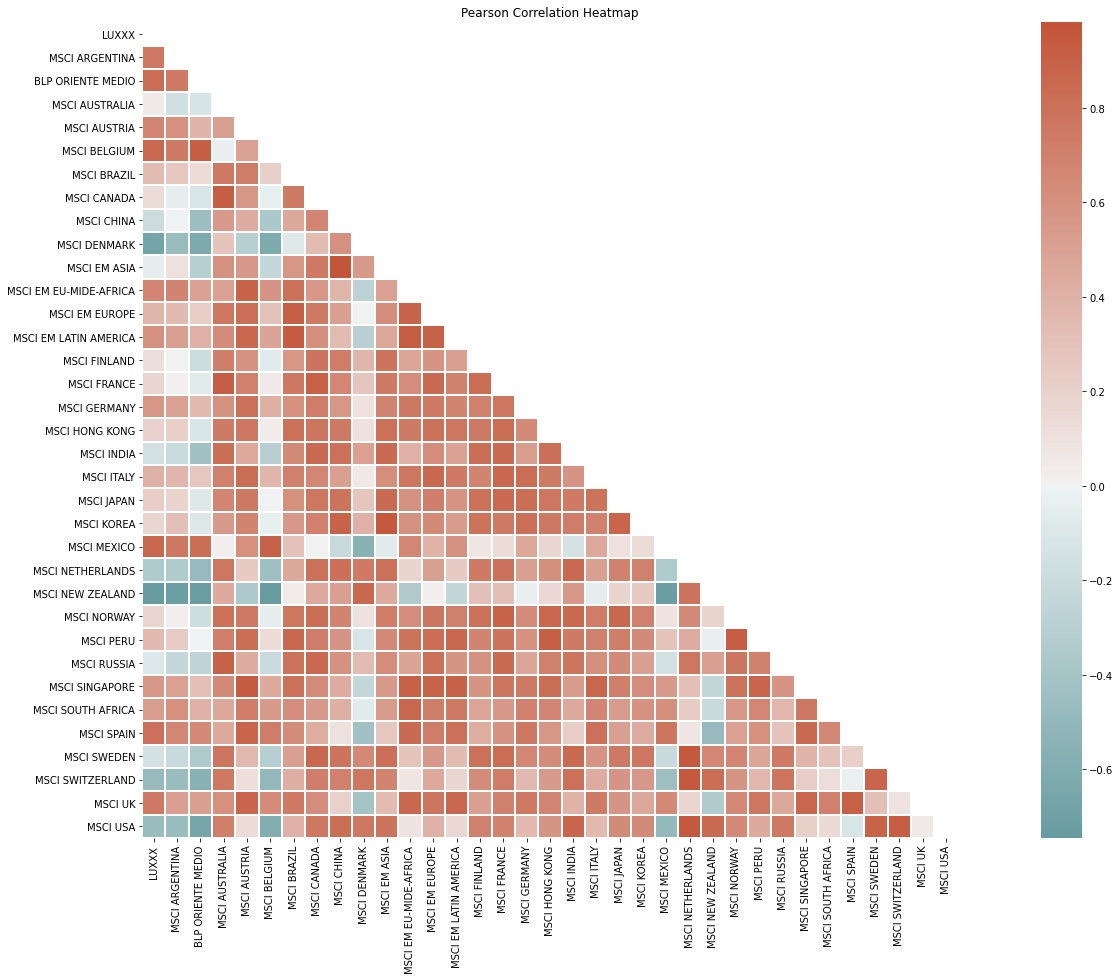

In [21]:
import seaborn as sns

correlation_matrix = data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(30,15))
cmap = sns.diverging_palette(200, 20, as_cmap=True)
sns.heatmap(correlation_matrix,
            mask=mask,
            cmap=cmap,
            center=0,
            square=True,
            linewidths=1)
ax.set_title('Pearson Correlation Heatmap')
plt.show()

# 5. Unsupervised Learning: Clustering

## 5.1 Calculate the Euclidean distance matrix for all 35 series

In [22]:
from sklearn.metrics.pairwise import euclidean_distances

# we will apply this to the returns, as it doesn't make sense to compute absolute distance between the raw price series
data_returns = data/data.shift(1)
data_returns.dropna(inplace=True)


# Note that this calculates the distances between the rows of the 35 series, instead of just to origin.
euclid_dist = euclidean_distances(data_returns,data_returns)
euclid_dist

array([[0.        , 0.21511572, 0.46062866, ..., 0.5745809 , 0.33516406,
        0.41991237],
       [0.21511572, 0.        , 0.34226444, ..., 0.4157993 , 0.20315807,
        0.28907323],
       [0.46062866, 0.34226444, 0.        , ..., 0.21744269, 0.20950328,
        0.19810003],
       ...,
       [0.5745809 , 0.4157993 , 0.21744269, ..., 0.        , 0.27170437,
        0.20289565],
       [0.33516406, 0.20315807, 0.20950328, ..., 0.27170437, 0.        ,
        0.16886788],
       [0.41991237, 0.28907323, 0.19810003, ..., 0.20289565, 0.16886788,
        0.        ]])

## 5.2  Run a k-means cluster on the 35 return series.

### 5.2.1 Firstly, we will use the Elbow method to determine the optimal number of clusters.

_"Calculate the Within-Cluster-Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS becomes first starts to diminish. In the plot of WSS-versus-k, this is visible as an elbow."_

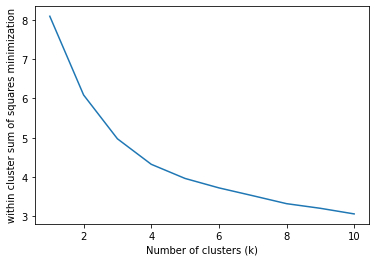

In [23]:
# Finding optimal number of clusters
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares minimization

for n in range(1, 11): 
    kmeans = KMeans(n_clusters=n, random_state=0, init='k-means++', n_init=10)
    kmeans.fit(data_returns)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters (k)')
plt.ylabel('within cluster sum of squares minimization')
plt.show()

Unfortunately we don't sess clearly clustered data.
And we can't make a clear decision on what we should choose as the optimal `k` value. 

### 5.2.2 The Silhouette Method

_The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation)._

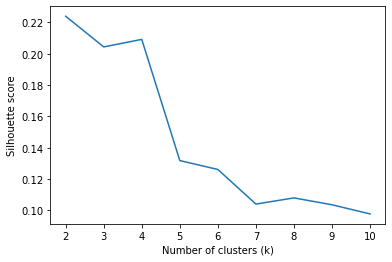

In [24]:
from sklearn.metrics import silhouette_score
silhouettes=[]

for n in range(2, 11): 
    kmeans = KMeans(n_clusters=n, random_state=0, init='k-means++', n_init=10)
    kmeans.fit(data_returns)
    labels = kmeans.labels_
    silhouettes.append(silhouette_score(data_returns, labels, metric='euclidean'))

plt.plot(range(2,11), silhouettes)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.show()

## 5.3 Justify your choice of k

__According to Elbow and Silhoutte method: 5-7 are best candiates for optimal number of clusters.__ 

__We pick 5 arbitrarily and explain our choice below in 5.7.__

## 5.4 Normalize each data series. Subtract each series by the weighted average from part 2.4.  Then divide this difference by the weighted volatility from part 3.4

This is the typical Z-score calculation. 
But note that the volatility has been calculated on log scale..can you just directly divide???


In [25]:
dataz = (data_returns - weighteddf['expected_return']) / weighted_vol['weighted_vol']
dataz

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,MSCI EM ASIA,MSCI EM EU-MIDE-AFRICA,MSCI EM EUROPE,MSCI EM LATIN AMERICA,MSCI FINLAND,MSCI FRANCE,MSCI GERMANY,MSCI HONG KONG,MSCI INDIA,MSCI ITALY,MSCI JAPAN,MSCI KOREA,MSCI MEXICO,MSCI NETHERLANDS,MSCI NEW ZEALAND,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-08,-2.425599,-1.134913,1.245709,-4.598810,-5.099607,1.366151,-11.261495,-6.415759,-9.116460,-0.596445,-9.167648,-5.367876,-5.901870,-7.473644,-1.296204,-4.044976,-2.302914,-6.632769,-6.966649,0.348384,-1.674630,-6.757182,-0.490948,-6.323859,-7.827279,-6.164980,-16.813981,-8.803739,-3.624561,-3.068788,-1.213493,-4.593682,-3.457259,-4.607363,-8.961195
2016-01-15,-1.567062,-0.832856,1.638104,-3.512036,-4.339308,2.121317,-10.842332,-5.927322,-8.520233,-0.792929,-8.445326,-5.238580,-6.088133,-6.580432,-1.074784,-3.243999,-1.176649,-6.052790,-6.361748,1.017695,-0.890046,-6.489535,1.139640,-5.151256,-7.207680,-5.680693,-16.182536,-10.030121,-3.580514,-2.514516,-0.552332,-3.744484,-2.053080,-3.635154,-8.028581
2016-01-22,-1.106727,-0.337207,1.456859,-2.940300,-3.155309,3.259996,-10.555025,-4.426442,-7.343418,1.544475,-7.391810,-3.462820,-4.563485,-6.164214,0.200151,-1.939925,0.003429,-6.172730,-6.060691,1.557555,-0.602626,-5.868815,1.328776,-3.691265,-7.734635,-3.228804,-14.750936,-6.942779,-2.768608,-1.146477,0.592305,-1.824576,-0.906030,-2.733743,-7.108506
2016-01-29,-0.392588,0.175298,3.932321,-2.398888,-3.372531,3.013523,-8.973432,-4.174363,-6.701482,1.167056,-6.550219,-1.950771,-3.471740,-4.895456,-0.066475,-2.133053,-0.465063,-4.192985,-5.155826,1.302332,0.696895,-5.620170,2.385203,-4.158425,-7.212233,-3.731425,-13.437455,-6.522171,-1.756749,-0.147132,0.372592,-2.987264,-1.196570,-2.305109,-7.041533
2016-02-05,-1.409106,-0.566142,3.207762,-3.082406,-4.049944,1.182228,-9.853011,-5.354594,-7.737606,-1.412523,-7.542447,-3.845466,-5.099035,-6.044883,-2.236299,-3.658876,-1.611269,-5.829391,-6.064609,0.229402,-1.169016,-5.847332,0.900216,-5.978768,-7.087719,-4.136756,-15.232913,-8.649241,-2.209763,-1.726162,-0.520161,-3.317640,-2.775257,-4.201536,-8.252870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-25,-2.218845,-1.033623,2.027839,-2.361678,-4.541191,1.366909,-11.043643,-5.290407,-8.064176,0.434222,-8.559156,-4.864981,-6.010366,-7.077774,-1.340115,-3.719334,-1.501673,-6.123881,-6.913932,0.944721,-0.349748,-7.127967,0.384948,-5.092043,-6.470662,-5.245442,-16.126096,-9.023502,-2.594374,-2.227089,-0.654523,-3.578409,-2.338667,-3.937664,-7.582600
2020-10-02,-0.119977,-0.241623,2.722920,-3.871778,-3.597875,2.975870,-10.735700,-4.974666,-6.548334,1.224982,-6.691729,-3.375410,-5.012309,-6.408419,-0.041574,-2.139729,-0.086788,-5.254903,-4.999418,1.986698,-0.521786,-5.495903,1.764721,-3.888735,-7.944771,-4.075643,-15.259829,-8.449247,-1.945908,-0.995044,0.595698,-2.440027,-1.350362,-2.894563,-7.042856
2020-10-09,-0.355646,0.121934,2.162582,-1.504545,-2.507204,3.582652,-9.374087,-4.551381,-6.212676,1.496415,-6.301508,-3.489905,-4.530278,-5.177084,0.206623,-1.995857,0.098074,-4.349285,-4.889311,2.230117,0.337033,-5.243487,2.616247,-4.122090,-6.205122,-3.746570,-14.782974,-7.768285,-1.970254,-1.408395,0.833326,-2.462239,-1.341899,-2.688091,-6.475480


## 5.5 Using the normalized data series, re-calculate the Euclidean distance matrix for all 35 series

In [26]:
# Note that this calculates the distances between the rows of the 35 series, instead of just to origin.
euclid_dist = euclidean_distances(dataz,dataz)
euclid_dist

array([[0.00000000e+00, 4.59311169e+00, 1.03359675e+01, ...,
        1.24512607e+01, 7.64534239e+00, 8.83530877e+00],
       [4.59311169e+00, 6.74349576e-07, 7.45540273e+00, ...,
        8.91740522e+00, 4.63757561e+00, 5.85585593e+00],
       [1.03359675e+01, 7.45540273e+00, 4.76837158e-07, ...,
        4.69540491e+00, 4.51501807e+00, 4.56114894e+00],
       ...,
       [1.24512607e+01, 8.91740522e+00, 4.69540491e+00, ...,
        0.00000000e+00, 5.53988229e+00, 4.54902881e+00],
       [7.64534239e+00, 4.63757561e+00, 4.51501807e+00, ...,
        5.53988229e+00, 0.00000000e+00, 3.35712380e+00],
       [8.83530877e+00, 5.85585593e+00, 4.56114894e+00, ...,
        4.54902881e+00, 3.35712380e+00, 0.00000000e+00]])

## 5.6 Using the normalized data series, run a k-means cluster on the 35 transformed variables

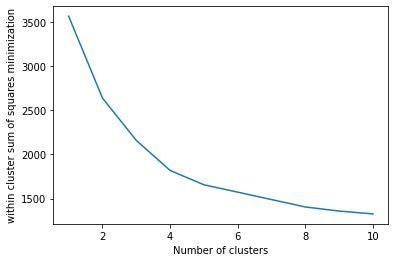

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0).fit(dataz)
y_kmeans = kmeans.predict(dataz)

wcss = [] # within cluster sum of squares minimization

for n in range(1, 11): 
    kmeans = KMeans(n_clusters=n, random_state=0, init='k-means++', n_init=10)
    kmeans.fit(dataz)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('within cluster sum of squares minimization')
plt.show()

## 5.7 Justify your choice of k

As discussed above in section 5.4 the optimal choice for number of clusters is between 5 and 7. 

We expect the number of clusters to represent how world economies handle new challenges. We can divide them into 5 groups: 
 
1.   Deep depression - significant GDP shrinkage
1.   Recession
1.   Stagnation
1.   Slow growth
1.   Expansion - continued to growth

Hence we will set `k` to 5 initially as it fits to observed behaviour

## 5.8 Were the 2 k values the same?

Yes. The k values (before and after normalization) are the same

## 5.9 Did the grouping of the series change as a result of your normalization?

No. The results stayed the same, which probably shows the choice of 5 clusters was optimal

# 6. Data selection

## 6.1 Choose one of the 35 variables to serve as your response variable (e.g. LUXXX).  You may choose the same one that your group used in the previous assignment.

The goal is to explain (not predict) the value of your response at time t, given the other 34 variables at time t.  DO NOT USE the response at time T + 1.  

Lets pick 'MSCI UK'

In [28]:
msci_uk = pd.DataFrame(data_returns['MSCI UK'])
all_other_indexes = pd.DataFrame(data_returns.drop(columns=['MSCI UK']))

msci_uk_binary = pd.DataFrame(msci_uk['MSCI UK'].le(msci_uk['MSCI UK'].shift()) * 1)
msci_uk_binary 

,MSCI UK
Date,
2016-01-08,0
2016-01-15,0
2016-01-22,0
2016-01-29,0
2016-02-05,1
...,...
2020-09-25,1
2020-10-02,0
2020-10-09,0


# 7. Compare unsupervised and supervised methods of learning

## 7.1 What is the difference between unsupervised learning and supervised learning?

*   Supervised learning and Unsupervised learning are machine learning tasks
*   Supervised learning is simply a process of learning algorithm from the training dataset. 
*   Supervised learning is where you have input variables and an output variable and you use an algorithm to learn the mapping function from the input to the output. The aim is to approximate the mapping function so that when we have new input data we can predict the output variables for that data.
*  Unsupervised learning is modeling the underlying or hidden structure or distribution in the data in order to learn more about the data. 
*  Unsupervised learning is where you only have input data and no corresponding output variables.

## 7.2 Which is clustering?  Which is CART?  Which is SVM?

- Clustering is unsupervised. 
- CART (decision trees) is a tree-type classification/regression which is supervised. 
- SVM is also a classification which is supervised. 


# 8. Compare and Contrast CART and SVM

## 8.1 What do the CART and SVM have in common?  Be specific as to how they cut the dimensional space

* Both CART and SVM split the input space into smaller subsets to aid separation of data into meaningful segments. Both can be used for classification purposes.

* SVM uses the kernel trick to transform an input space into another high dimensional feature space where the data can be separated into a single hyperplane. 

* On the other hand, decision trees / CARTS split input space into hyper-rectangles (i.e. on multiple "hyperplane" lines) without transformation into another state space. A one-level CART can be understood as the most similar to a SVM where only 1 single decision criterion / hyperplane is used.

## 8.2 How do the CART and SVM methodologies differ?

* In addition to how they split space up differently as described above, CART handles categorical data whereas SVM can only handle numerical data.

* CART is known being vulnerable to overfitting, while SVM gives more more robust results.

* CART is said to build "Local models", while SVM builds a "Global model" by learning separating hyperplane.


# 9. Classification and Regression Trees (CART)

## 9.1 Perform a Classification Tree, where the response is categorical: whether your return was higher or lower than the previous week.  (Ties can be ignored).  Choose a suitable depth of the tree, basing your result on cross-validation

We first make a cross validation train test split set. 
This can be used for all the ML algos to come, and to standardize training v.s. test set.

In [29]:
from sklearn.model_selection import train_test_split

# For binary..whether higher or lower
X_train, X_test, y_train, y_test = train_test_split(all_other_indexes.to_numpy(), 
                                                    msci_uk_binary.to_numpy(), 
                                                    test_size=0.33, 
                                                    random_state=0)

# For regression..weekly return
Xr_train, Xr_test, yr_train, yr_test = train_test_split(all_other_indexes.to_numpy(), 
                                                        msci_uk.to_numpy(), 
                                                        test_size=0.33, 
                                                        random_state=0)


In [30]:
from sklearn import tree
from sklearn.metrics import accuracy_score

clf1 = tree.DecisionTreeClassifier(random_state=0, splitter='best')
clf1 = clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
print(f'accuracy = {accuracy_score(y_test, y_pred)}')
print(f'score = {clf1.score(X_test, y_test)}')
print(f'depth = {clf1.get_depth()}')

accuracy = 0.6265060240963856
score = 0.6265060240963856
depth = 7


## 9.2 Perform a Regression Tree.  The difference here is the response is continuous.  This value should be the weekly return that you calculated on each series. Choose a suitable depth of the tree, basing your result on cross-validation

In [31]:
clf2 = tree.DecisionTreeRegressor(random_state=0, splitter='best')
clf2 = clf2.fit(Xr_train, yr_train)
yr_pred = clf2.predict(Xr_test)
clf2.score(Xr_test, yr_test)  # this is the coefficient of determination R^2
print(f'score = {clf2.score(Xr_test, yr_test)}')
print(f'depth = {clf2.get_depth()}')

score = 0.20087168172001058
depth = 15


## 9.3 Which performed better, the classification or the regression tree?

Clearly Classification Tree results are better than Regression Tree results.
see detils in section 11 in separate document

# 10. Support Vector Machines (SVM)

## 10.1 Instead of running a regression tree, use SVM.Use the original space of 35 variables

In [32]:
from sklearn import svm
from sklearn.metrics import r2_score

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    data.drop(columns=['MSCI UK']).to_numpy(), 
    data['MSCI UK'].to_numpy(), 
    test_size=0.33, 
    random_state=0)

# Note that if we don't specify the kernel, the default is rbf, radial basis function
clf1 = svm.SVR()  
clf1 = clf1.fit(Xr_train, yr_train)
yr_pred = clf1.predict(Xr_test)
print(f'score = {clf1.score(Xr_test, yr_test)}')

score = -0.18079466611226436


A negative score shows that the model does not predict outcoume

## 10.2 Choose a kernel.  Rerun the SVM.

In [33]:
# Note that if we don't specify the kernel, the default is rbf, radial basis function
clf2 = svm.SVR(kernel='linear')  
clf2 = clf2.fit(Xr_train, yr_train)
print(f'score = {clf2.score(Xr_test, yr_test)}')

score = 0.4512790873206445
